# Universal Function Approximator

![UFA](../nb_images/ufa.png)


## How if this Universal Function Aproximator Different from Simple Curve Fitting?

In typical curve fitting you fit a curve to the data assuming a form of the function to be fit

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def unknown_func(x, a, b, c):
    return a * np.exp(-b * x) + c

## Define the data to be fit with some noise:

In [ ]:
xdata = np.linspace(0, 4, 50)
initialParams = (2.5, 1.3, 0.5)
y = unknown_func(xdata, *initialParams)
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

## Fit for the parameters a, b, c of the function func:

In [ ]:
plt.plot(xdata, ydata, 'b-', label='data')

popt, pcov = curve_fit(unknown_func, xdata, ydata)
plt.plot(xdata, unknown_func(xdata, *popt), 'r--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("New fit parameters", popt)
print("Inital True parameters", initialParams)

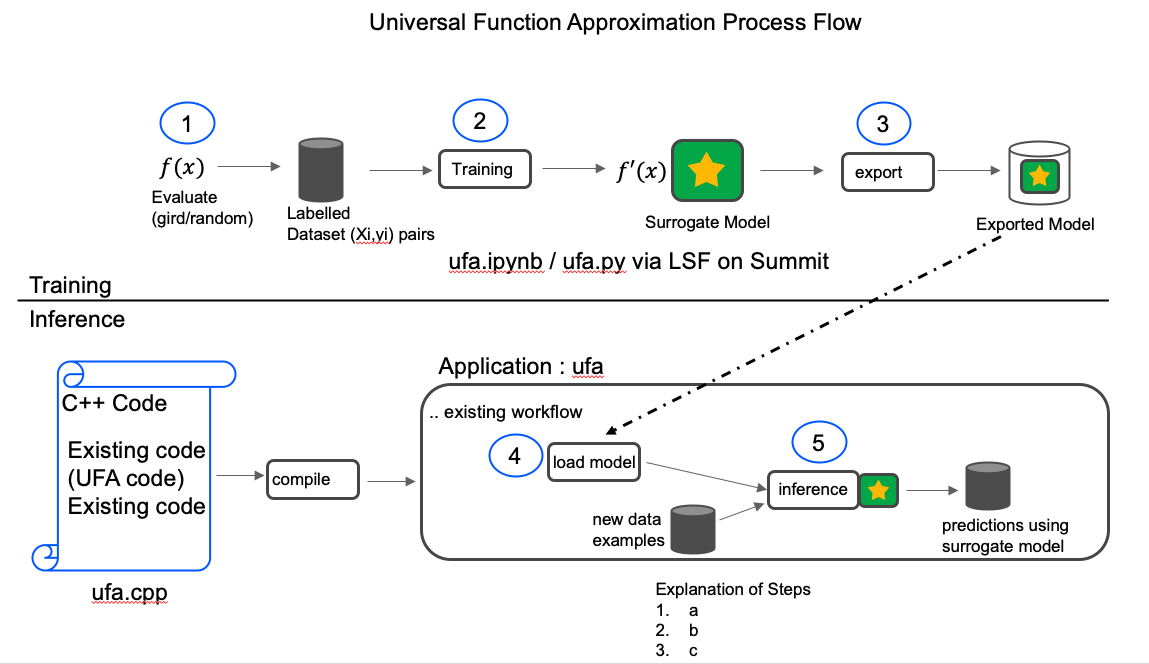


## References - Universal Approximation Theorem

 - https://en.wikipedia.org/wiki/Universal_approximation_theorem
 
### free online book: Neural Networks and Deep Learning
 
 - http://neuralnetworksanddeeplearning.com/
 
### A visual proof that neural nets can compute any function

 - http://neuralnetworksanddeeplearning.com/chap4.html
 

## Steam Tables

### Thermodynamic Properties of Water (Steam Tables) 
 - https://www.ohio.edu/mechanical/thermo/property_tables/H2O/

### Superheated Vapor Properties for Steam - (0.01 MPa - 0.4 MPa)
 - https://www.ohio.edu/mechanical/thermo/property_tables/H2O/H2O_Super1.html

### Python implementation of standards from The InternationalAssociation for the Properties of Water and Steam
 - https://tsapps.nist.gov/publication/get_pdf.cfm?pub_id=50556
 - http://www.iapws.org/release.html
 - https://github.com/jjgomera/iapws
 - https://pypi.org/project/iapws/

### Thermodynamic Properties of Ordinary Water Substance for Industrial Use
 - http://twt.mpei.ac.ru/mcs/worksheets/iapws/IAPWS-IF97-Region1.xmcd

### NIST Chemistry WebBook, SRD 69 
- Isobaric Properties for Water

 - https://webbook.nist.gov/cgi/fluid.cgi?Action=Load&ID=C7732185&Type=IsoBar&Digits=5&P=.3&THigh=400&TLow=150&TInc=50&RefState=DEF&TUnit=C&PUnit=MPa&DUnit=kg%2Fm3&HUnit=kJ%2Fkg&WUnit=m%2Fs&VisUnit=uPa*s&STUnit=N%2Fm

### Steam tables: example 2 YouTube
 - https://www.youtube.com/watch?v=N3WD33o0Sx0

### How to Use Steam Tables
 - https://www.youtube.com/watch?v=NDVsypmpTKo

### Regression with Neural Networks in PyTorch
 - https://medium.com/@benjamin.phillips22/simple-regression-with-neural-networks-in-pytorch-313f06910379

 - What is a 3D phase diagram?
   - https://socratic.org/questions/what-is-a-3d-phase-diagram
   


## Here is actual function definition from IAPWS for Region 2 and 3

In [ ]:
# Boundary Region2-Region3
def _P23_T(T):
    """Define the boundary between Region 2 and 3, P=f(T)

    Parameters
    ----------
    T : float
        Temperature, [K]

    Returns
    -------
    P : float
        Pressure, [MPa]

    References
    ----------
    IAPWS, Revised Release on the IAPWS Industrial Formulation 1997 for the
    Thermodynamic Properties of Water and Steam August 2007,
    http://www.iapws.org/relguide/IF97-Rev.html, Eq 5

    Examples
    --------
    >>> _P23_T(623.15)
    16.52916425
    """
    n = [0.34805185628969e3, -0.11671859879975e1, 0.10192970039326e-2]
    return n[0]+n[1]*T+n[2]*T**2

In [ ]:
# default_exp ufa

## Install IAPWS Software

In [ ]:
#!conda install -y plotly
#!pip install iapws
#!pip install livelossplot


# Plot of Isobars for Steam Table

THis seems to be a common diagram to duplicate. Its a 2D way of plotting the 3D surface

We will plot a few isobars from the steam table to show the complexity of the non linearity

In water, the critical point occurs at 647.096 K (373.946 °C; 705.103 °F) and 22.064 MPa (3,200.1 psi; 217.75 atm)

1 atm = 0.101325 MPa


# Use IAPWS95 data to plot isobaric T/V plot for water

Properties of water depend on state. There are 6 common state variables that can describe the state of water - solid, liquid, gas, superheated steam, sublimation, evaporation, etc. Only two of the states variables are needed to describe the state of water - the other 4 or so state varibales can be determined once the state is known from the other 2. The common state variables seen in textbooks for steam include:

P: Pressure

T: Temperature

S: Entropy - The entropy of an object is a measure of the amount of energy which is unavailable to do work. Entropy is also a measure of the number of possible arrangements the atoms in a system can have. In this sense, entropy is a measure of uncertainty or randomness.

H: Enthalpy - Enthalpy is a measure of heat in the system. They use the formula H = U + PV. H is the enthalpy value, U is the amount of internal energy, and P and V are pressure and volume of the system.

U: Internal Energy - The internal energy of a thermodynamic system is a measure of the energy within it, excluding the kinetic energy of motion of the system as a whole, and the potential energy of the system as a whole due to external force fields. It keeps account of the gains and losses of energy of the system that are due to changes in its internal state

V: Specific Volume (inverse of density)  m^3/Kg

# Build a model to Predict ISO Therms


In this example, we will model the following function f


Independent Variables : T=Temperature & V = specific volume
Output Variable (Label): Pressure

P = f(T,V)

## Imports

In [ ]:
# export
# Nested list comprehension 
# matrix = [[j for j in range(5)] for i in range(5)] 
print("Imports section ***** \n\n")
from iapws import IAPWS95
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from numpy import savetxt

import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data
import imageio
from livelossplot import PlotLosses
import sys
from sklearn import preprocessing
from IPython.display import display
from iapws import IAPWS95



In [ ]:
# Plotting Backend
%matplotlib inline

## IAPWS Quick Demo

In [ ]:
# Example of using existing region based peicemeal polynomials to approximate steam tables and other water properties
sat_steam=IAPWS95(P=1,x=1)                #saturated steam with known P
sat_liquid=IAPWS95(T=370, x=0)            #saturated liquid with known T
steam=IAPWS95(P=2.5, T=500)               #steam with known P and T
print(sat_steam.h, sat_liquid.h, steam.h) #calculated enthalpies

t = 320
T = t + 273.15
v = 20

test = IAPWS95(v=v, T=T)
print('Temperature: ', test.T)
print('Specific Volume: ', test.v)
print('Pressure: ', test.P)
print('Internal Energy: ', test.u)
print('Entropy: ', test.s)
print('Enthalpy: ', test.h)

# Create DataSet

## Define Configuration

In [ ]:
# export
print("Define Configuration ***** \n\n")
def npt(mystring) :
    print("**{}** : {}".format(sys._getframe(1).f_code.co_name,mystring))

def get_config(cfg_in={}):
    config = {}
    # Tx = 10          # variable per batch sequence length
    config["device"] = "cuda"
    config["hidden_size"] = 2000  # number of features of hidden state
    config["num_layers"]  = 1  # this is for stacked implementations.  Keep 1 for now
    config["num_epochs"]  = 300  # this is for stacked implementations.  Keep 1 for now
    config["batch_size"] = 8
    config["test_batch_size"] = 64
    config["weight_decay"]=0.00
    config["learning_rate"]=0.00005
    config["tls"]=(275,393,30)
    config["vls"]=(6.85,120,30)
    
    # overwrite configs if passed
    for (k,v) in cfg_in.items() :
        npt("Overriding Config {}:{} with {}".format(k,config[k],v))
        config[k] = v
    return config

# config.items
def print_run(config) :
    npt("Project Configuration")
    for k,v in sorted(config.items()) :
        # print(i)
        print("{}:{}".format(k,v))

print_run(get_config({"learning_rate":0.01}))

## Create Dataset ..
Lets create a simple pandas dataframe using the IAPWS95 function

In [ ]:
# export
print("Create Dataset section ***** \n\n")
def create_iap_data(cfg, normalize=True) :
    vls =np.linspace(*cfg['vls'])
    tls =np.linspace(*cfg['tls'])
    rv = [[[t,v,IAPWS95(T = t, v = v).P] for v in vls] for t in tls]
    rv = np.asarray(rv)
    # Take the values calculated along Temp/SpecV axes and just flatten into columns..
    rv = rv.reshape(-1,3)
    df = pd.DataFrame(rv,columns=["x0_Temp","x1_SpecificVol","y_Pressure"])
    print("Created data array of size : {}".format(rv.shape))
    print("Returning Pandas Dataframe ")

    if(normalize==True):
        x = df.values #returns a numpy array
        std_scaler = preprocessing.StandardScaler()
        x_scaled = std_scaler.fit_transform(x)
        df = pd.DataFrame(x_scaled,columns=["x0_Temp","x1_SpecificVol","y_Pressure"])
    return df


In [ ]:
#testing
example_df  = create_iap_data(get_config({"tls":(274,400,5),"vls":(6.85,120,5)}))
example_df.head(20)

## 3D Plotting Utility

In [ ]:
# export
print("3D Plotting Utilty section ***** \n\n")
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default = "iframe_connected"
from scipy.spatial import Delaunay

def iap3d(cfg,z_evaled):

    u = np.linspace(*cfg['tls'])
    v = np.linspace(*cfg['vls'])
    print("ushape pre meshgrid : {}".format(u.shape))
    print("vshape pre meshgrid : {}".format(v.shape))
    u,v = np.meshgrid(u,v)
    print("ushape post meshgrid : {}".format(u.shape))
    print("vshape post meshgrid : {}".format(v.shape))

    u = u.flatten()
    v = v.flatten()
    
    x=u
    y=v
    z = z_evaled  # already evaluated...

    print("x  : {}".format(x.shape))
    print("y  : {}".format(y.shape))
    print("z  : {}".format(z.shape))

    points2D = np.vstack([u,v]).T
    print("points2D  : {}".format(points2D.shape))
    tri = Delaunay(points2D)  # https://en.wikipedia.org/wiki/Delaunay_triangulation
    simplices = tri.simplices
    simplices.shape
    print("points2D  : {}".format(points2D.shape))
#
    fig = ff.create_trisurf(x=x, y=y, z=z,
                             simplices=simplices,
                             title="Iap3D", aspectratio=dict(x=1, y=1, z=0.3),)
    return fig

# Test this ... Requires exact same config that was used to build your dataframe ...


In [ ]:
fig=iap3d(get_config({"tls":(274,400,5),"vls":(6.85,120,5)}),example_df["y_Pressure"].values)

Default renderer: 'notebook_connected'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [ ]:
#fig.show()
fig.show(renderer="iframe_connected")


![image.png](../nb_images/3dphase.png)

## Define Model

In [ ]:
# export
print("Define Model section ***** \n\n")
def fcnet(cfg):
    net = torch.nn.Sequential(
        torch.nn.Linear(2, cfg["hidden_size"], bias=True),
        torch.nn.ReLU(),
        torch.nn.Linear(cfg["hidden_size"], 1, bias=True),
        #torch.nn.ReLU(),
        #torch.nn.Linear(cfg["hidden_size"], 1, bias=True),
    )
    return net

## Define Dataloader

In [ ]:
# export
print("Define Dataloader section ***** \n\n")
def get_dataloader(cfg,iap_data):
    x = torch.Tensor(iap_data.iloc[:,0:2].values)
    y = torch.Tensor(iap_data.iloc[:,2].values)
    npt(" X shape:{}".format(x.size()))
    npt(" Y shape:{}".format(y.size()))
    # x = x.reshape(-1,2)
    # y = y.reshape(-1,1)
    # npt("Reshaped X shape:{}".format(x.size()))
    # npt("Reshaped Y shape:{}".format(y.size()))

    torch_dataset = Data.TensorDataset(x, y)
    loader = Data.DataLoader(
        dataset=torch_dataset, 
        batch_size=cfg["batch_size"], 
        shuffle=True, num_workers=8,)  
    npt("Num batches :{}".format(len(loader)))
    return loader

In [ ]:
# export
print("Initialize Weights section ***** \n\n")
# Initialize with Xavier normal distribuition        
from torch.nn.init import xavier_normal_ , uniform_

def weights_xavier(m):
    if isinstance(m, torch.nn.Conv2d):
        xavier_normal_(m.weight.data)
    elif isinstance(m, torch.nn.Linear) :
        xavier_normal_(m.weight.data)
        m.bias.data.fill_(0)


## Training Loop

In [ ]:
# export
print("Fit Model function def section ***** \n\n")
def fit_model(cfg,net,loader,verbose=False ) :
    optimizer = torch.optim.Adam(net.parameters(), lr=cfg["learning_rate"], weight_decay=cfg["weight_decay"])
    loss_func = torch.nn.MSELoss() # this is for regression mean squared loss
    # Setup Pytorch in training mode
    net.train()
    # start training
    loss_hist = {}
    liveloss = PlotLosses()
    logs = {}
    lowest = 999999
    
    best_params = None
    for epoch in range(cfg["num_epochs"]):
        epoch_loss = 0
        for step, (batch_x, batch_y) in enumerate(loader): # for each training step               
            prediction = net(batch_x).reshape(-1)     # input x and predict based on x
            if verbose :npt("batch_x.size:{}".format(batch_x.size()))
            if verbose :npt("batch_y.size:{}".format(batch_y.size()))
            if verbose :npt("prediction.size:{}".format(prediction.size()))
    
            loss = loss_func(prediction, batch_y)     # must be (1. nn output, 2. target)
            epoch_loss += loss.detach().cpu().numpy() 
            optimizer.zero_grad()   # clear gradients for next train
            loss.backward()         # backpropagation, compute gradients
            optimizer.step()        # apply gradients
            
        epoch_loss = epoch_loss / 900
        
        # Draw Loss curves, gradients, and current inference results...
        visualize_results(cfg,epoch,liveloss,epoch_loss,loss_hist,net)
        print("epoch_loss {}".format(epoch_loss))
        pstr = '\repoch: {},  lr: {}, lowest_loss: {:7.5e}, latest_loss: {:7.5e}\n'.format(epoch, cfg["learning_rate"], lowest, epoch_loss)
        print(pstr,end="")
    return epoch_loss

# uses global iap_df as closure for now
def visualize_results(cfg,epoch,liveloss,epoch_loss,loss_hist,net) :
    if epoch > 1:
        if epoch_loss < min(loss_hist):
            best_params = net #copy()
            lowest = min(loss_hist)
    loss_hist[epoch] = epoch_loss
    
    if(epoch_loss < 0.10):
            liveloss.update({
                'clipped loss': epoch_loss,
                'log_loss': np.log10(epoch_loss)
            })
    else:
        liveloss.update({
            'clipped loss': 0.10,
            'log_loss': np.log10(epoch_loss)
        })                
    
    # figure = iap3d(cfg,iap_df["y_Pressure"].values)
    liveloss.draw()   
    # Get Current prediction and graph it! 
    cur_prediction = net(torch.tensor(iap_df.iloc[:,0:2].values, dtype=torch.float))
    cur_prediction = cur_prediction.detach().cpu().reshape(-1).numpy()
    figure = iap3d(cfg,cur_prediction)
    #figure.show()
    figure.show(renderer="iframe_connected")

## Run job

In [ ]:
# export
print("Run Job section ***** \n\n")
# Setup Run Configuration
cfg=get_config({'num_epochs' : 60})
print(cfg)

# Build Dataset
iap_df = create_iap_data(cfg)
display(iap_df.describe())
iap3d(cfg,iap_df["y_Pressure"].values)

In [ ]:
# export
print("get_dataloader section ***** \n\n")
# Create DataLoader
dl = get_dataloader(cfg,iap_df)

In [ ]:
# fig.write_image('IAPWS_actual.jpg')

In [ ]:
# export
print("Build Model section ***** \n\n")
# Build Model
iap_net = fcnet(cfg)
# Initialize Model
iap_net.apply(weights_xavier)

In [ ]:
# export
print("def model_stats section ***** \n\n")
# Simple model stats
# plot just the first convolutional layer weight distribution
def model_stats(model):
    for idx, (n,m) in enumerate(model.named_modules()):
        if(isinstance(m,torch.nn.modules.Linear)) :
            #print(n,m, m.weight.size())
            parmeters = m.weight.detach().cpu().numpy().flatten()            
            print("n:{} m:{} param mean:{}, std :{}".format(n, m, np.mean(parmeters), np.std(parmeters)))
            #print(m)

# test
model_stats(fcnet(cfg))

In [ ]:
# export
print("print model_stats section ***** \n\n")
model_stats(iap_net)

In [ ]:
# export
print("Train Model LR = 0.001 section ***** \n\n")
# Train Model
epoch_loss = fit_model(get_config({"num_epochs":6,"learning_rate":0.001}),iap_net,dl)

In [ ]:
# export
print("Train Model LR = 0.0005 section ***** \n\n")
# Train Model
epoch_loss = fit_model(get_config({"num_epochs":6,"learning_rate":0.0005}),iap_net,dl)

In [ ]:
# export
print("Train Model LR = 0.0001 section ***** \n\n")
epoch_loss = fit_model(get_config({"num_epochs":6,"learning_rate":0.0001}),iap_net,dl)

## Inference in Jupyter Notebook

In [ ]:
# export
print("def inference_all section ***** \n\n")
def inference_all() :
    iap_net.eval()
    #prediction = net(b_x)
    x = torch.tensor(iap_df.iloc[:,0:2].values, dtype=torch.float)
    print(x.shape)
    prediction = iap_net(x)
    prediction.flatten().size()
    return prediction
    #YP = prediction.detach().cpu().numpy().squeeze()
    #Y_STANDARD
prediction = inference_all()

In [ ]:
iap3d(cfg,iap_df.iloc[:,2].values)

In [ ]:
fig = iap3d(cfg,prediction.flatten().detach().cpu().numpy())
fig.show()

## Experimentation required to get here:


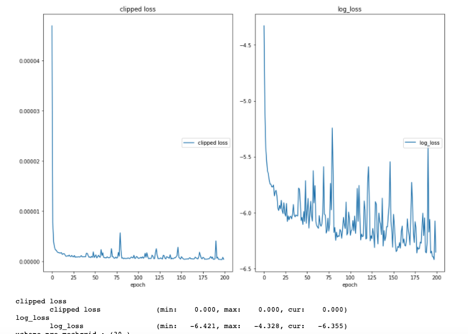

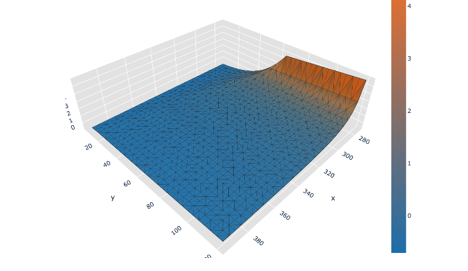

 - epoch_loss = fit_model(get_config({"num_epochs":200,"learning_rate":0.000002}),iap_net,dl)



 - epoch_loss 4.4124976574898434e-07

 - epoch: 199, lr: 2e-06, lowest_loss: 2.27697e-08, latest_loss: 4.41250e-07


### Secret Sauce:

def fcnet(cfg):
   net = torch.nn.Sequential(
       torch.nn.Linear(2, cfg["hidden_size"], bias=True),
       torch.nn.ReLU(),
       torch.nn.Linear(cfg["hidden_size"], 3*cfg["hidden_size"], bias=True),
       torch.nn.ReLU(),
       torch.nn.Linear(3*cfg["hidden_size"], 1, bias=True),       
   )
   return net
   
epoch_loss = fit_model(get_config({"num_epochs":200,"learning_rate":0.000002}),iap_net,dl)


## Export a Model
Following the directions from here 
https://pytorch.org/tutorials/advanced/cpp_export.html

In [ ]:
# export
print("jit trace section ***** \n\n")
# Convert a PyTorch model to Torch Script via tracing
example = torch.tensor(iap_df.iloc[:,0:2].values, dtype=torch.float)
traced_script_module = torch.jit.trace(iap_net, example)

In [ ]:
# Behaved

In [ ]:
# export
print("traced_script_module ***** \n\n")
# Torch Script behaves just like pytorch model
output = traced_script_module(example)

In [ ]:
# export
print("Serialize Torchscript Module  ***** \n\n")
# Serialize Torchscript Module 
traced_script_module.save("traced_ufa_ts.pt")

In [ ]:
# Test .. Simple Model requires 2 inputs!

In [ ]:
# export
print("Example Inference  ***** \n\n")
x_in = torch.ones([2, 2])
print(iap_net(x_in))


## Run in python via LSF

These are notes, run this via command line in summit

In [ ]:
# !pwd
# !cd ../ORNL
# !bsub 04_submit_ufa.lsf

#  Build C++ Application for Inference

In [ ]:
# Inspect UFA c++ code
# 1. load torch libraries
# 2. load torch model
# 3. create a simple tensor
# 4. run inference on model in C++

!cat ufa.cpp

In [ ]:
# Build C++ app .  Only works on Summit 
!pwd
!./build_ufa.sh

## Inference with CPP

In [ ]:
# Runn application against Trained Module
# !ufa traced_ufa_ts.pt

## Submit via LSF

In [ ]:
# !cd ../ORNL
# !bsub submit_0

# ipynb -> py conversion using nbdev [leave commented out]

In [ ]:
## Create ufa.py 
#-----------------
#! cd ..; bash process_files.sh
#!ls ../py_aicoc


## Run python file directly 
#-----------------
# !cd ../py_aicoc; python ufa.py